In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
## we will normalize the column names of the dataset
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [4]:
# consider only few elements as features
df = df[['ram', 'storage','screen','final_price']]

In [5]:
X = np.array(df[['ram', 'storage','screen','final_price']])
X

array([[   8.  ,  512.  ,   15.6 , 1009.  ],
       [   8.  ,  256.  ,   15.6 ,  299.  ],
       [   8.  ,  256.  ,   15.6 ,  789.  ],
       ...,
       [  32.  , 1000.  ,   17.3 , 3399.99],
       [  16.  , 1000.  ,   13.4 , 1899.99],
       [  16.  ,  256.  ,   13.4 , 1699.99]])

In [6]:
## EDA - Verify whether final_price column has long tain. For this we plot final_price using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


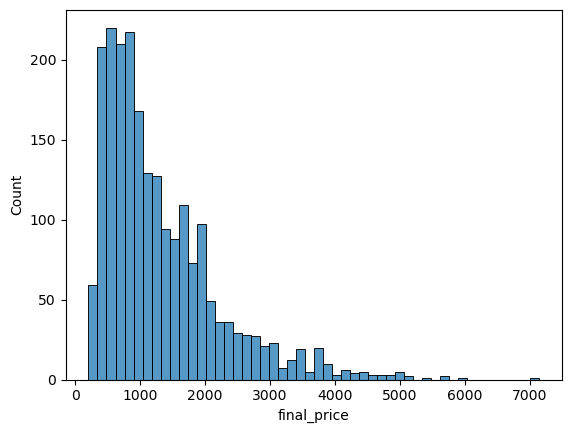

In [7]:
sns.histplot(df.final_price, bins=50)
plt.show()


In [8]:
## We see that there is long tail as there are quite a few laptops with price > 3000
# Now lets apply log and see how the distribution looks


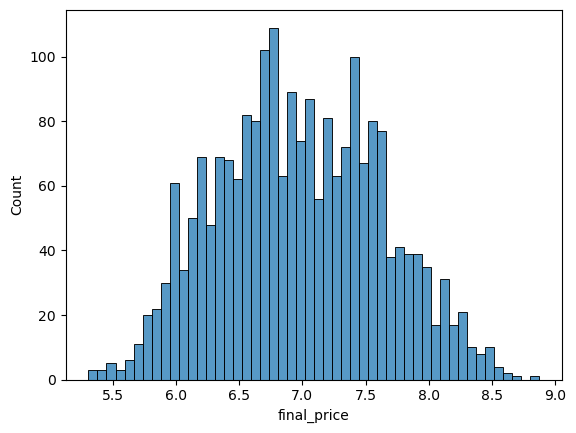

In [9]:
price_logs = np.log1p(df.final_price)
sns.histplot(price_logs, bins=50)
plt.show()


In [10]:
# now we see a kind of bell curve which is ideal for generating models

In [11]:
# Question 1. Identify column that has missing values  

In [12]:
df.columns[df.isnull().any()].tolist()

['screen']

In [13]:
df.final_price.unique()

array([1009.  ,  299.  ,  789.  , ..., 2699.99, 1899.99, 1699.99])

In [14]:
# From the given optons in the question, the columns screen has missing values

In [15]:
#2, what is the median value of column ram  - Ans 16
int(df.ram.median())

16

In [16]:
## Now we prepare & split the dataset
total = len(df)
n_val = int(total * 0.2)
n_test = int(total * 0.2)
n_train = total - (n_val + n_test)

n_val, n_test, n_train

(432, 432, 1296)

In [17]:
## Shuffle the data and then split into train, validat and test daatsets.
idx = np.arange(total)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [18]:
# do the actul splitting of the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val : ]]

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [19]:
df_test

,ram,storage,screen,final_price
1925,32,1000,15.6,4805.65
612,16,512,13.0,2189.00
443,16,512,15.6,1349.00
1002,16,512,15.0,2175.83
1077,16,1000,15.6,1248.59
...,...,...,...,...
1638,8,512,15.0,1838.29
1095,8,256,15.6,531.80
1130,8,256,13.3,765.33
1294,8,512,14.0,803.61


In [20]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [21]:
# now reset the indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [22]:
df_val

,ram,storage,screen,final_price
0,32,1000,16.0,2599.00
1,16,512,15.6,999.00
2,12,512,15.6,477.28
3,8,256,13.6,1519.00
4,8,512,15.6,402.99
...,...,...,...,...
427,8,128,13.0,1049.00
428,8,256,13.3,799.00
429,8,512,14.0,565.54
430,16,512,14.0,738.00


In [23]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

len(y_train), len(y_val), len(y_test)

(1296, 432, 432)

In [24]:
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [25]:
# now delete the final_proce variable from the train, test and val datasets. This is because we want to predict price
# and so price should not be part of the input dataset
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [26]:
df_train

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1291,8,256,14.0
1292,32,1000,16.0
1293,16,512,15.6
1294,16,512,14.0


## Fill missing values with ZERO and train linear regression

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [28]:
train_linear_regression(df_train, y_train)

(nan, array([nan, nan, nan]))

In [29]:
# we got nan because df_train contains some zero values. Lets replace them with 0s and retry
df_train.columns
base = ['ram', 'storage', 'screen']
X_train = df_train[base].fillna(0).values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [30]:
# now run the training this time using X_train
W0, w = train_linear_regression(X_train, y_train)
W0, w

(6.7271637061124805, array([ 0.02630589,  0.00066041, -0.03651909]))

In [31]:
y_pred = W0 + X_train.dot(w)
y_pred

array([7.65966079, 6.35973416, 7.71809133, ..., 6.91648826, 6.9749188 ,
       6.9749188 ])

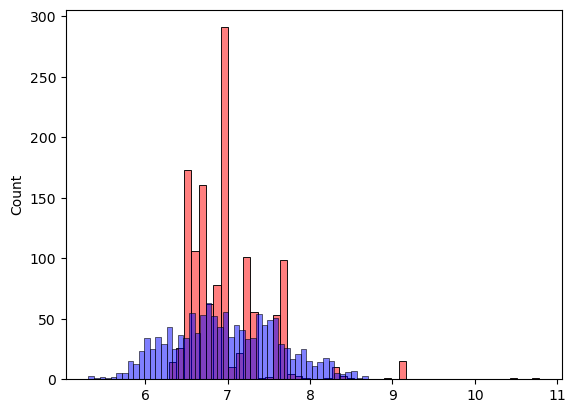

In [32]:
# now lets compare y_pred and y_train to see how good is our prediction
sns.histplot(y_pred, color = 'red', alpha= 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha= 0.5, bins = 50)
plt.show()


In [33]:
## RMSE
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [34]:
rmse(y_train, y_pred)

0.44632651855038796

In [35]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [36]:
prepare_X(df_train)

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [37]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = round(rmse(y_val, y_pred),2)
score

0.43

## Fill missing values with median and train linear regression

In [38]:
mean = df_train.screen.mean()
mean

15.163534416086618

In [39]:
def prepare_X(df, mean):
    df_num = df[base]
    df_num = df_num.fillna(mean)
    X = df_num.values
    return X

In [40]:
X_train = prepare_X(df_train, mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean)
y_pred = w0 + X_val.dot(w)

score_mean = round(rmse(y_val, y_pred),2)
score_mean

0.43

In [41]:
score, score_mean

(0.43, 0.43)

In [42]:
# For question 3, answer is c that is Both are equally good

In [43]:
# Question 4 

In [44]:
def prepare_X(data):
    df1 = data.copy()  # Copy over original data set so that the function wont modify its contents
    features = base.copy()
    df1_num = df1[features]
    df1_num = df1_num.fillna(0)
    return df1_num.values

In [45]:
# Train linear regression with regularization

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
    

In [46]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score = round(score,2)
score

0.43

In [47]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    score = round(score, 2)
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0 bias term:  6.7271637061124805 rmse:  0.43
reg parameter:  0.01 bias term:  6.721004333260219 rmse:  0.43
reg parameter:  0.1 bias term:  6.666075503828108 rmse:  0.43
reg parameter:  1 bias term:  6.162616499461252 rmse:  0.43
reg parameter:  5 bias term:  4.616086176497313 rmse:  0.46
reg parameter:  10 bias term:  3.5167547207936254 rmse:  0.51
reg parameter:  100 bias term:  0.6849263362660136 rmse:  0.67


In [48]:
# Answer for question 4 is 0. That is r value of 0 gives best RMSE`

In [49]:
total = len(df)
n_val = int(total * 0.2)
n_test = int(total * 0.2)
n_train = total - (n_val + n_test)



In [50]:
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [61]:
df = pd.read_csv('laptops.csv')
df.head()
total = len(df)
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [81]:
#Question 5
def shuffle_data(seed_nbr):
    idx = np.arange(total)
    np.random.seed(seed_nbr)
    np.random.shuffle(idx)
    
    # Split the data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val : ]]
    
    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)
    
    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']
    return df_train, df_val, y_train, y_val
    
def train_the_model(dataset, seed_val):
    # df_train, df_val, y_train, y_val = shuffle_data(seed_val)

    idx = np.arange(total)
    np.random.seed(seed_val)
    np.random.shuffle(idx)
    
    # Split the data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val : ]]
    
    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)
    
    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    return round(rmse(y_val, y_pred),3)

def run_model_for_seeeds():
    rmse_list = []
    for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        val = train_the_model(df_train, s)
        rmse_list.append(val)

    return rmse_list

In [89]:
rmse_values = run_model_for_seeeds()
std = np.std(rmse_values)
round(std, 3)


0.014

In [88]:
std = np.std(rmse_values)
std

0.013733171520082325

In [90]:
# Question 5

idx = np.arange(total)
np.random.seed(9)
np.random.shuffle(idx)

# Split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val : ]]

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

# Combine train & val datasets
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X(df_full_train)

w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)

X_test = prepare_X(df_test) 

y_full_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_full_pred)
score


0.45530472280909234